In [1]:
from radd import devtests

In [10]:
from radd import fitre, utils, cRADD, build
from scipy.stats.mstats import mquantiles as mq
#!/usr/local/bin/env python
from lmfit import report_fit, fit_report
from __future__ import division
import numpy as np
import pandas as pd
from lmfit import Parameters, Minimizer
from radd.utils import *
from radd.cRADD import recost
from radd import cRADD

from scipy.optimize import minimize as mina

data = redf_store['rebsl']
ip = redf_store['rebsl_boot_popt']
m=build.Model(data=data, inits=ip, fit='subjects', depends_on={'v':'Cond'})
m.prepare_fit()

preparing reactive model using subjects method


In [ ]:
all_params=1
lim = {'tr': (.001, .5), 'v': (.01, 4.),  'ssv': (-4., -.01),  'a' : (.01, .6)}
lim = {'tr': (.001, .5), 'v': (.01, 4.),  'ssv': (-4., -.01),  'a' : (.01, .6)}
if 'pGo' in inits.keys(): del inits['pGo']
if 'ssd' in inits.keys(): del inits['ssd']

p=Parameters()
if all_params:
      p.add('a', value=inits['a'], vary=1, min=lim['a'][0], max=lim['a'][1])
      p.add('ssv', value=-abs(inits['ssv']), vary=1, min=lim['ssv'][0], max=lim['ssv'][1])
      p.add('v', value=inits['v'], vary=1, min=lim['v'][0], max=lim['v'][1])
      #p.add('zperc', value=inits['z']/inits['a'], vary=1, min=.001, max=.99)
      p.add('tr', value=inits['tr'], vary=1, min=lim['tr'][0], max=lim['tr'][1])
      #p.add('z', expr="zperc*a")
      p.add('z', value=inits['z'], vary=1, min=.01, max=.3)
      
m = build.Model(data=data, inits=inits, all_params=1, depends_on={'v':'Cond'}, fit='subjects')
m.prepare_fit()

In [25]:
ntrials=2000

data = redf_store['rebsl']
ip = redf_store['rebsl_boot_popt']
inits = ip.copy()

all_params=1



lim = {'tr': (.001, .5), 'v': (.01, 4.),  'ssv': (-4., -.01),  'a' : (.01, .6)}
if 'pGo' in inits.keys(): del inits['pGo']
if 'ssd' in inits.keys(): del inits['ssd']

p=Parameters()
if all_params:
      p.add('a', value=inits['a'], vary=1, min=lim['a'][0], max=lim['a'][1])
      p.add('ssv', value=-abs(inits['ssv']), vary=1, min=lim['ssv'][0], max=lim['ssv'][1])
      p.add('v', value=inits['v'], vary=1, min=lim['v'][0], max=lim['v'][1])
      #p.add('zperc', value=inits['z']/inits['a'], vary=1, min=.001, max=.99)
      p.add('tr', value=inits['tr'], vary=1, min=lim['tr'][0], max=lim['tr'][1])
      #p.add('z', expr="zperc*a")
      p.add('z', value=inits['z'], vary=1, min=.01, max=.3)
      
m = build.Model(data=data, inits=inits, all_params=1, depends_on={'v':'Cond'}, fit='subjects')
m.prepare_fit()

y=utils.rangl_re(data)
popt = Minimizer(recost, p, fcn_args=(y, ntrials), fcn_kws={'wts':m.wts['bsl']})

popt.prepare_fit()
init_cost = recost(p, y, wts=m.wts['bsl'])
#plt.plot(x, init, 'b--')
popt.scalar_minimize(maxfun=50, full_output=True, disp=True, method='differential_evolution')

report_fit(p)
report_fit(popt)

with open('fit_report.txt', 'w') as f:
      f.write(print(fit_report(p)))
      f.write(print(fit_report(popt)))

preparing reactive model using subjects method


In [51]:
lim = {'xxx': (.001, .5), 'v': (.01, 4.),  'ssv': (-4., -.01),  'a' : (.01, .6), 'f':(1,2)}
inits['xxx']=.15
p0 = [p.add(par, value=inits[par], vary=1, min=l[0], max=l[1]) for par, l in lim.items() if par in inits.keys()]

In [153]:
i = redf_store['repnl_boot_popt']

In [154]:
inits=i.copy()
inits

{'a': 0.44409409200000016,
 'ssv': -0.94733930099999974,
 'tr': 0.30487069800000016,
 'v': 1.0610553444933331,
 'z': 0.1542465550000002}

In [104]:
#inits = redf_store['rebsl_boot_popt']
method='nelder'
inits['ssv']=-abs(inits['ssv'])
lim = {'tr': (.001, .5), 'v': (.01, 4.),  'ssv': (-4., -.01),  'a' : (.01, .6), 'z':(.001, .9)}
if 'pGo' in inits.keys(): del inits['pGo']
if 'ssd' in inits.keys(): del inits['ssd']
p=Parameters()
if method!='differential_evolution':
      zlim = lim.pop('z')
      alim = lim.pop('a')
      p.add('a', value=inits['a'], vary=1, min=alim[0], max=alim[1])
      p.add('zperc', value=inits['z']/inits['a'], vary=1)
      p.add('z', expr="zperc*a")

p0 = [p.add(par, value=inits[par], vary=1, min=l[0], max=l[1]) for par, l in lim.items()]

In [105]:
p

Parameters([('a', <Parameter 'a', 0.44409409200000016, bounds=[0.01:0.6]>), ('zperc', <Parameter 'zperc', 0.34732854541104802, bounds=[0.001:0.99]>), ('z', <Parameter 'z', 0.1542465550000002, bounds=[-inf:inf], expr='zperc*a'>), ('ssv', <Parameter 'ssv', -0.94733930099999974, bounds=[-4.0:-0.01]>), ('tr', <Parameter 'tr', 0.30487069800000016, bounds=[0.001:0.5]>), ('v', <Parameter 'v', 1.0610553444933331, bounds=[0.01:4.0]>)])

In [93]:
 if method!='differential_evolution':
            zlim = lim.pop('z')
            p.add('zperc', value=inits['z']/inits['a'], vary=1, min=.001, max=.99)
            p.add('z', value='', expr="zperc*a")

In [140]:
print fit_report(popt)

[[Fit Statistics]]
    # function evals   = 0
    # data points      = 0
    # variables        = unknown
    chi-square         = unknown
    reduced chi-square = unknown
[[Variables]]
    a:     0.44409409 (init= 0.4440941)
    ssv:  -0.01000000 (init= 0.9473393)
    v:     1.12235977 (init= 1.12236)
    tr:    0.30487069 (init= 0.3048707)
    z:     0.15424655 (init= 0.1542466)
    xxx:   0.15000000 (init= 0.15)
[[Correlations]] (unreported correlations are <  0.100)
[[Variables]]
    v:     1.06105534 (init= 1.061055)
    tr:    0.30487069 (init= 0.3048707)
    a:     0.4440941 (fixed)
    ssv:  -0.9473393 (fixed)
    z:     0.1542466 (fixed)
[[Correlations]] (unreported correlations are <  0.100)


In [147]:
%pwd

u'/home/kyle/Dropbox'

In [152]:
fitid=None
with open('fit_report.txt', 'a') as f:
      if fitid is None:
            fitid = time.strftime('%H:%M:%S')
      f.write(str(fitid)+'\n')
      f.write(fit_report(popt)+'\n\n\n')


In [159]:
def fit_reactive_model(y, inits={}, depends=['xx'], wts=None, model='radd', ntrials=5000, maxfun=5000, ftol=1.e-3, xtol=1.e-3, all_params=0, disp=False, fitid=None, method='Nelder-Mead', zrelative=True):

      
      lim = {'tr': (.001, .5), 'v': (.01, 4.),  'ssv': (-4., -.01),  'a' : (.01, .6), 'z':(.001, .9)}
      if 'pGo' in inits.keys(): del inits['pGo']
      if 'ssd' in inits.keys(): del inits['ssd']
      inits['ssv']=-abs(inits['ssv'])

      p=Parameters()
      if not all_params:
            d0 = [p.add(d, value=inits.pop(d), vary=1, min=lim[d][0], max=lim[d][1]) for d in depends]

      if method=='differential_evolution':
            pass
      else:
            aval = inits.pop('a'); zval = inits.pop('z')
            p.add('a', value=aval, vary=vary, min=lim['a'][0], max=lim['a'][1])
            p.add('zperc', value=zval/aval, vary=vary)
            p.add('z', expr="zperc*a")

      p0 = [p.add(k, value=v, vary=all_params, min=lim[k][0], max=lim[k][1]) for k, v in inits.items()]

      popt = Minimizer(recost, p, fcn_args=(y, ntrials), fcn_kws={'wts':wts})
      popt.scalar_minimize(maxfun=maxfun, ftol=ftol, xtol=xtol, full_output=True, disp=disp, method=method)

      params=p.valuesdict()
      params['chi']=popt.chisqr
      resid=popt.residual; yhat=y+resid

      with open('fit_report.txt', 'a') as f:
            if fitid is None:
                  fitid = time.strftime('%H:%M:%S')
            f.write(str(fitid)+'\n')
            f.write(fit_report(popt)+'\n\n\n')

      return params, yhat


In [156]:
p=Parameters()
if all_params:
      if method!='differential_evolution':
            zlim = lim.pop('z'); alim = lim.pop('a')
            p.add('a', value=inits['a'], vary=1, min=alim[0], max=alim[1])
            p.add('zperc', value=inits['z']/inits['a'], vary=1)
            p.add('z', expr="zperc*a")

      p0 = [p.add(par, value=inits[par], vary=1, min=l[0], max=l[1]) for par, l in lim.items()]

else:
      #dval = [inits.pop(depends[i]) for i in range(len(depends))]
      pd = [p.add(d, value=inits.pop(d), vary=1, min=lim[d][0], max=lim[d][1]) for d in depends]
      p0 = [p.add(par, value=inits[par], vary=0) for par in inits.keys()]

In [135]:
params=p.valuesdict()
params['chi']=popt.chisqr

OrderedDict([('v', 1.0610553444933331), ('tr', 0.30487069800000016), ('a', 0.44409409200000016), ('ssv', -0.94733930099999974), ('z', 0.1542465550000002), ('chi', None)])

In [157]:
p.pretty_print()

Parameters({
    'v': <Parameter 'v', 1.0610553444933331, bounds=[0.01:4.0]>, 
    'tr': <Parameter 'tr', 0.30487069800000016, bounds=[0.001:0.5]>, 
    'a': <Parameter 'a', value=0.44409409200000016 (fixed), bounds=[None:None]>, 
    'ssv': <Parameter 'ssv', value=-0.94733930099999974 (fixed), bounds=[None:None]>, 
    'z': <Parameter 'z', value=0.1542465550000002 (fixed), bounds=[None:None]>, 
    })



In [119]:
inits

{'a': 0.44409409200000016,
 'ssv': -0.94733930099999974,
 'tr': 0.30487069800000016,
 'z': 0.1542465550000002}

In [21]:
#popt.prepare_fit()
start_cost = recost(p, y)


NameError: name 'exit_cost' is not defined

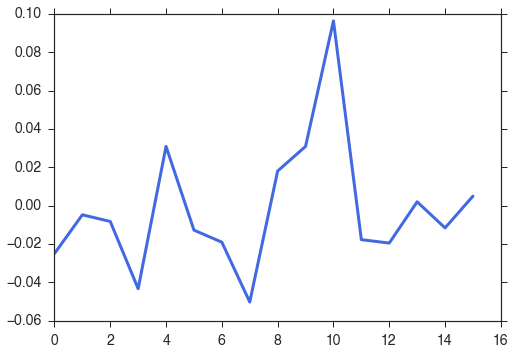

In [38]:
sns.set_context('notebook', font_scale=1.4)

popt.prepare_fit()
init_cost = recost(p, y, wts=m.wts['bsl'])







exit_cost = recost(p, y, wts=m.wts['bsl'])
plt.plot(init_cost, 'RoyalBlue', label='$\chi_{init}^2 = %.5f$' % np.sum(init_cost)**2, lw=3)
plt.plot(exit_cost, 'RoyalBlue', label='$\chi_{init}^2 = %.5f$' % np.sum(init_cost)**2, lw=3)
plt.hlines(y=0, xmin=0, xmax=15, lw=2, linestyle='--', alpha=.7)
sns.despine()
plt.legend(fontsize=18)
plt.savefig('./cost.png')


In [11]:
popt.scalar_minimize(maxfun=50, full_output=True, disp=True, method='differential_evolution')

In [3]:
t = devtests.compare_ols_wls_predictions(data, ip, maxfun=15, ntrials=5000, save=False)

preparing reactive model using subjects method


In [355]:
report_fit(p)
report_fit(popt)

with open('fit_report.txt', 'w') as f:
      f.write(print(fit_report(p)))
      f.write(print(fit_report(popt)))

[[Variables]]
    a:       0.45967252 (init= 0.4440941)
    ssv:    -1.05416919 (init=-0.9473393)
    v:       1.18713039 (init= 1.290714)
    zperc:   0.34209432 (init= 0.3473285)
    tr:      0.30665190 (init= 0.3048707)
    z:       0.15725136  == 'zperc*a'
[[Correlations]] (unreported correlations are <  0.100)
[[Fit Statistics]]
    # function evals   = 71
    # data points      = 16
    # variables        = 5
    chi-square         = 0.023342075
    reduced chi-square = 0.002
[[Variables]]
    a:       0.45967252 (init= 0.4440941)
    ssv:    -1.05416919 (init=-0.9473393)
    v:       1.18713039 (init= 1.290714)
    zperc:   0.34209432 (init= 0.3473285)
    tr:      0.30665190 (init= 0.3048707)
    z:       0.15725136  == 'zperc*a'
[[Correlations]] (unreported correlations are <  0.100)


In [365]:
sd = m.observed.groupby(m.cond).std()

pc = m.data.query('trial_type=="go"').groupby(m.cond).response.mean().values
pe = m.data.query('trial_type=="stop"').groupby(m.cond).response.mean().values

sdc = sd.loc[:,'c5':'c95'].values
sde = sd.loc[:,'e5':'e95'].values

lbls = m.data[m.cond].unique()

wtc = np.array([p*(s.min()/s) for p, s in zip(pc, sdc)])
wte = np.array([p*(s.min()/s) for p, s in zip(pe, sde)])

In [383]:
sdc[0].min()/sdc[0]


array([ 0.90293322,  1.        ,  0.90850019,  0.88396654,  0.84966831])

In [316]:
inits = ip.copy()
inits['v']=ip['v']+.15*ip['v']
m = build.Model(data=data, inits=inits, depends_on={'v':'Cond'}, fit='subjects')
m.prepare_fit()

wts = m.wts['bsl']
#wts=np.ones_like(wts)
y = m.observed.query('Cond=="bsl"').mean().iloc[1:].values

ntrials=10000
maxfun=500
ftol=1.e-2
xtol=1.e-2
all_params=1
disp=True

lim = {'tr': (.001, .5), 'v': (.01, 4.),  'ssv': (-4., -.01),  'a' : (.01, .6)}


if 'pGo' in inits.keys(): del inits['pGo']
if 'ssd' in inits.keys(): del inits['ssd']

p=Parameters()

if all_params:
      p.add('a', value=inits['a'], vary=1, min=lim['a'][0], max=lim['a'][1])
      p.add('ssv', value=inits['ssv'], vary=1, min=lim['ssv'][0], max=lim['ssv'][1])
      p.add('v', value=inits['v'], vary=1, min=lim['v'][0], max=lim['v'][1])
      p.add('zperc', value=inits['z']/inits['a'], vary=1, min=.01, max=.99)
      p.add('tr', value=inits['tr'], vary=1, min=lim['tr'][0], max=lim['tr'][1])
      p.add('z', expr="zperc*a")
else:
      for key, val in inits.items():
            if key in depends:
                  p.add(key, value=val, vary=1, min=lim[key][0], max=lim[key][1])
                  continue
            p.add(key, value=val, vary=0)

preparing reactive model using subjects method


In [335]:
p.valuesdict()

OrderedDict([('a', 0.45967252595505481), ('ssv', -1.0541691978141601), ('v', 1.1871303949690408), ('zperc', 0.34209432472573892), ('tr', 0.30665190552312055), ('z', 0.15725136236156917)])

In [ ]:
collect=wls_update

popt = Minimizer(recost_nb, p, fcn_args=(y, ntrials), fcn_kws={'wts':wts, 'collect':collect}, method='Nelder-Mead')
popt.fmin(maxfun=4, ftol=ftol, xtol=xtol, full_output=True, disp=disp)
params={k: p[k].value for k in p.keys()}
params['chi']=popt.chisqr
resid=popt.residual; yhat=y+resid

In [320]:
len(ols_update)

79

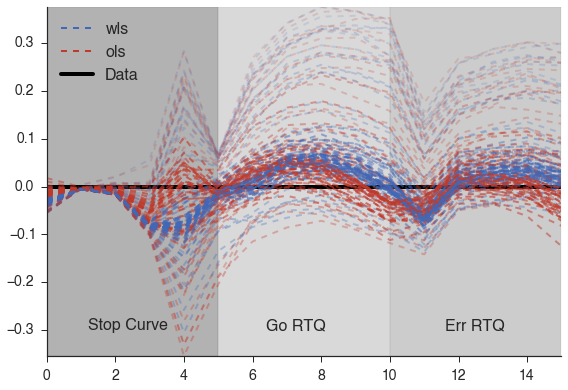

In [356]:
sns.set_context('notebook', font_scale=1.4)
htmin, htmax = [], []

nsims=np.min([len(ols_update), len(wls_update)])
alpha = np.linspace(.15,.75, nsims)

for i in range(nsims):
      
      wres = y-wls_update[i]
      ores = y-ols_update[i]
      
      plt.plot(wres, color='#4168B7', alpha=alpha[i], linestyle='--', lw=2)
      plt.plot(ores, color='#c0392b', alpha=alpha[i], linestyle='--', lw=2)
      
      htmin.append(np.hstack([ores, wres]).min())
      htmax.append(np.hstack([ores, wres]).max())


plt.plot(np.arange(10,20,10), label='wls', color='#4168B7', alpha=1, linestyle='--', lw=2)
plt.plot(np.arange(10,20,10), label='ols', color='#c0392b', alpha=1, linestyle='--', lw=2)

ht = np.array([np.min(htmin), np.max(htmax)])      
plt.fill_betweenx(ht, x1=0, x2=5, color='k', alpha=.3)
plt.fill_betweenx(ht, x1=5, x2=10, color='k', alpha=.15)
plt.fill_betweenx(ht, x1=10, x2=15, color='k', alpha=.2)
plt.hlines(y=0, xmin=0, xmax=15, color='k', linestyle='-', lw=4, label='Data')
plt.setp(plt.gca(), xlim=(0,15), ylim=(ht[0], ht[1]))
sns.despine()      
plt.legend(loc=0, fontsize=16)
ax = plt.gca()
ax.text(1.2, -.3, 'Stop Curve', fontsize=16)
ax.text(6.4, -.3, 'Go RTQ', fontsize=16)
ax.text(11.6, -.3, 'Err RTQ', fontsize=16)
plt.tight_layout()
plt.savefig('/home/kyle/Dropbox/track_optimizer_rebsl.png', dpi=600)

In [344]:
popt.

In [314]:
def recost_nb(theta, y=None, ntrials=2000, wts=None, pGo=.5, fit=True, collect=None, ssd=np.arange(.2, .45, .05)):

      if not type(theta)==dict:
            #pu = theta.copy()
            theta = theta.valuesdict()
            #iter_update.append(pu.valuesdict())

      a, tr, v, ssv, z  = theta['a'], theta['tr'], theta['v'], -abs(theta['ssv']),  theta['z']
      #if 'zperc' in theta.keys():
            

      nss = int((1-pGo)*ntrials)
      dvg, dvs = cRADD.run(a, tr, v, ssv, z, ssd, nss=nss, ntot=ntrials)
      yhat = cRADD.analyze_reactive(dvg, dvs, a, tr, ssd, nss=nss)
      #ols_update.append(yhat)
      if collect==[]:
            collect.append(yhat)
            
      wtc, wte = wts[0], wts[1]
      cost = np.hstack([y[:6]-yhat[:6], wtc*y[6:11]-wtc*yhat[6:11], wte*y[11:]-wte*yhat[11:]]).astype(np.float32)
      
      
      if collect==[]:
            collect.append(yhat)
            
      return cost


array([ 0.9268595 ,  0.98830485,  0.97303247,  0.86013103,  0.53338009,
        0.13202624,  5.12819576,  5.47817516,  5.67953157,  5.85847759,
        6.10287666,  4.94813681,  5.28328943,  5.50362492,  5.68832922,
        5.95608377], dtype=float32)

In [159]:
popt.values

{'a': 0.44469733069229772,
 'ssv': -0.95641363603405694,
 'tr': 0.30564869699698249,
 'v': 1.1000045565918406,
 'z': 0.15362025100803273,
 'zperc': 0.34544900633624037}

In [121]:
def recost_nb(theta, y, ntrials=2000, wts=None, pGo=.5, ssd=np.arange(.2, .45, .05)):

      if not type(theta)==dict:
            theta = theta.valuesdict()

      a, tr, v, ssv, z  = theta['a'], theta['tr'], theta['v'], -abs(theta['ssv']),  theta['z']

      nss = int((1-pGo)*ntrials)
      dvg, dvs = cRADD.run(a, tr, v, ssv, z, ssd, nss=nss, ntot=ntrials)
      yhat = cRADD.analyze_reactive(dvg, dvs, a, tr, ssd, nss=nss)

      if wts is None:
            cost = (y-yhat).astype(np.float32)
      else:
            wtc, wte = wts[0], wts[1]
            cost = np.hstack([y[:6]-yhat[:6], wtc*y[6:11]-wtc*yhat[6:11], wte*y[11:]-wte*yhat[11:]]).astype(np.float32)

      return cost


In [270]:
#popt = Minimizer(recost, p, fcn_args=(y, ntrials), method='Nelder-Mead')
a, tr, v, ssv, z  = theta['a'], theta['tr'], theta['v'], -abs(theta['ssv']),  theta['z']
x0=[a, tr, v, ssv, z]
fit = mina(recost_nb, p, args=(y, wts, ntrials), method='Nelder-Mead', options={'disp':True, 'xtol':xtol, 'ftol':ftol, 'maxfev': 10})
#popt.fmin(maxfun=50, ftol=ftol, xtol=xtol, full_output=True, disp=disp)

In [268]:
def recost_scipy(p, y=None, wts=None, ntrials=2000, pGo=.5, ssd=np.arange(.2, .45, .05)):

      a, tr, v, ssv, z  = p[0], p[1], p[2], p[3], p[4]
      
      nss = int((1-pGo)*ntrials)
      dvg, dvs = cRADD.run(a, tr, v, ssv, z, ssd, nss=nss, ntot=ntrials)
      yhat = cRADD.analyze_reactive(dvg, dvs, a, tr, ssd, nss=nss)

      if wts is None:
            cost=np.sum((y[0]-yhat[0])**2+(y[1:6]-yhat[1:6])**2+(y[6:11]-yhat[6:11])**2+(y[11:]-yhat[11:])**2)
      else:
            wtgc, wtsc, wtgq, wteq = wts[0], wts[1], wts[2], wts[3]
            cost = np.sum((wtgc*(y[0]-yhat[0]))**2+(wtsc*(y[1:6]-yhat[1:6]))**2 +(wtgq*(y[6:11]-yhat[6:11]))**2+(wteq*(y[11:]-yhat[11:]))**2)

      return cost

In [327]:
def recost(theta, y, ntrials=2000, wts=None, pGo=.5, ssd=np.arange(.2, .45, .05)):

      if not type(theta)==dict:
            theta = theta.valuesdict()#theta={k:theta[k].value for k in theta.keys()}

      a, tr, v, ssv, z  = theta['a'], theta['tr'], theta['v'], -abs(theta['ssv']),  theta['z']

      nss = int((1-pGo)*ntrials)
      dvg, dvs = cRADD.run(a, tr, v, ssv, z, ssd, nss=nss, ntot=ntrials)
      yhat = cRADD.analyze_reactive(dvg, dvs, a, tr, ssd, nss=nss)

      if wts is None:
            cost = (y-yhat).astype(np.float32)
            #wtcost = cost[0]*wts[0], 
      else:
            wta, wtc, wte = wts[0], wts[1], wts[2]
            cost = np.hstack([(y[:6]-yhat[:6]), wtc*(y[6:11]-yhat[6:11]), wte*(y[11:]-yhat[11:])]).astype(np.float32)

      return cost
